In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm

from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.datasets import make_classification, make_blobs
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_curve, auc, roc_auc_score, plot_precision_recall_curve
from mlxtend.plotting import plot_decision_regions

plt.style.use("seaborn-white")
warnings.filterwarnings('ignore')

## Problem 1.1

In [120]:
𝑋, 𝑦 = 𝑚𝑎𝑘𝑒_𝑐𝑙𝑎𝑠𝑠𝑖𝑓𝑖𝑐𝑎𝑡𝑖𝑜𝑛()

In [136]:
data = pd.DataFrame(data = np.c_[X, y])
data.columns = np.array(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "Response"])
data.Response = pd.to_numeric(data.Response, downcast = "signed")
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Response
0,-0.999489,-0.648512,0.078140,0.812933,0.719880,1.326827,-1.015809,-0.976457,0.636240,-0.450081,-0.387537,1.945433,2.285662,-0.413971,1.909911,0
1,-0.020292,0.639573,-0.409676,-1.090553,1.148850,0.943462,-0.804238,-1.986945,0.308785,1.312210,0.310990,-0.392014,0.610411,-0.905450,0.757476,1
2,0.747450,0.894537,-0.641555,1.604041,2.197606,-1.487400,0.339954,0.551776,-0.129381,0.960874,-1.318515,1.523884,3.142634,-1.709111,2.938391,0
3,-0.722419,0.481524,-1.031762,0.431620,0.927098,-1.206222,1.806773,0.871526,2.417536,-2.231560,0.765960,-2.301115,-1.231387,-1.270783,-0.688861,1
4,-0.609191,1.026804,-0.034305,-1.772546,2.960557,0.249716,0.428060,1.190832,0.826177,0.125555,-1.084644,-1.719036,0.957327,-0.380747,1.487680,1


In [137]:
y = data.Response
X = data.drop(["Response"], axis = 1)

X.shape, y.shape

((4000, 15), (4000,))

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3200, 15)
X_test shape: (800, 15)
y_train shape: (3200,)
y_test shape: (800,)


In [139]:
Cs = [0.000001 ,0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
Cs

[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [140]:
logreg_cv = LogisticRegressionCV(Cs = Cs, cv = 10, scoring = "accuracy")
logreg_cv.fit(X_train, y_train)
logreg_cv.score(X_train, y_train)

0.8321875

In [141]:
scores = logreg_cv.scores_
scores = np.mean(scores[1], axis = 1)
scores

array([0.77375  , 0.7853125, 0.77125  , 0.8015625, 0.751875 , 0.8225   ,
       0.778125 , 0.780625 , 0.78875  , 0.791875 ])

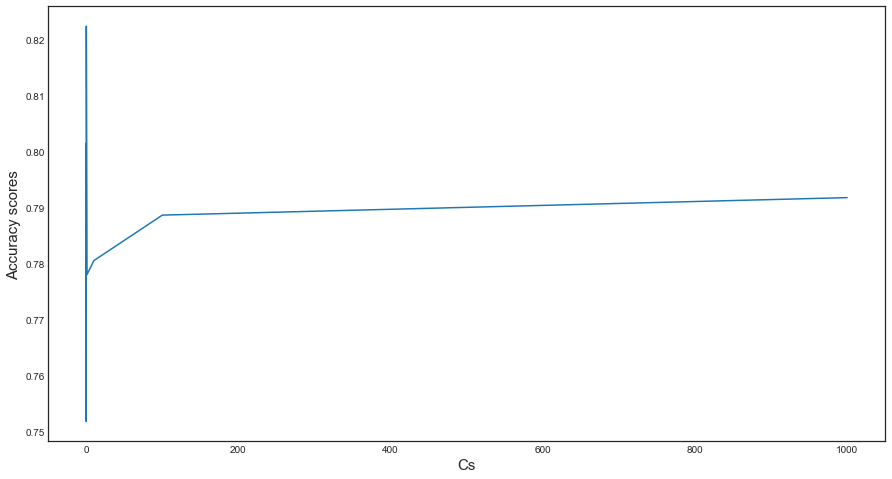

In [142]:
plt.figure(figsize = (15,8)) 
plt.plot(Cs, scores)
plt.xlabel("Cs", fontsize = 15)
plt.ylabel("Accuracy scores", fontsize = 15)
plt.show()

In [143]:
optimal_c = logreg_cv.C_
optimal_c = optimal_c[0]

print("Optimal C is:", optimal_c)
print("Corresponding accuracy is:", logreg_cv.score(X_train, y_train))

Optimal C is: 0.01
Corresponding accuracy is: 0.8321875


## Problem 1.2

In [144]:
optimal_c

0.01

In [38]:
logreg_model = LogisticRegression(C = 0.01)
logreg_model.fit(X_train, y_train)
logreg_model_train_score = logreg_model.score(X_train, y_train)
logreg_model_test_score = logreg_model.score(X_test, y_test)

print("Logistic Regression train score:", logreg_model_train_score)
print("Logistic Regression test score:", logreg_model_test_score)

Logistic Regression train score: 0.8353125
Logistic Regression test score: 0.81875


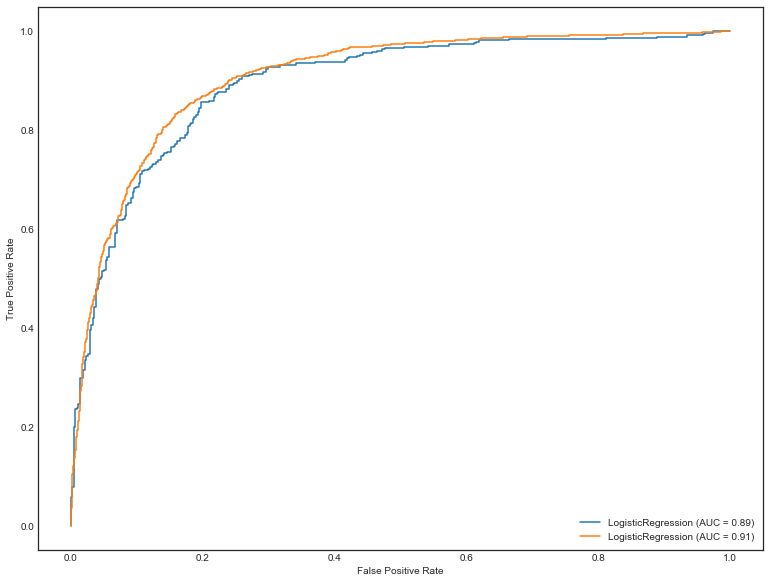

In [46]:
fig = plt.figure(figsize = (13, 10))
ax = plt.gca()
logreg_disp_test = plot_roc_curve(logreg_model, X_test, y_test, ax = ax)
logreg_disp_train = plot_roc_curve(logreg_model, X_train, y_train, ax = ax)
plt.show()

In [49]:
logreg_pred_test = logreg_model.predict(X_test)
logreg_pred_train = logreg_model.predict(X_train)

print("Test Classification Report")
print(classification_report(y_test, logreg_pred_test))
print("Train Classification Report")
print(classification_report(y_train, logreg_pred_train))

Test Classification Report
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       415
           1       0.80      0.82      0.81       385

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800

Train Classification Report
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1597
           1       0.83      0.84      0.84      1603

    accuracy                           0.84      3200
   macro avg       0.84      0.84      0.84      3200
weighted avg       0.84      0.84      0.84      3200



## Problem 2.1

In [53]:
𝑋, 𝑦 = 𝑚𝑎𝑘𝑒_𝑏𝑙𝑜𝑏𝑠()

In [58]:
data = pd.DataFrame(data = np.c_[X, y])
data.columns = np.array(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "Response"])
data.Response = pd.to_numeric(data.Response, downcast = "signed")
data.head()

,A,B,C,D,E,F,G,H,I,J,Response
0,-8.487996,-4.321813,3.355609,-5.578995,3.480476,0.585027,-11.336449,0.357398,-3.070621,-0.442660,1
1,-0.299406,-0.578555,2.302235,-4.243380,4.448448,7.572241,-6.718634,-5.910549,-21.337506,-6.173980,0
2,-3.015450,3.347927,-8.032663,-1.775816,12.249013,3.394724,-3.968544,2.095373,-11.924165,-6.141182,0
3,2.944445,3.678646,-9.210053,-2.164280,9.875881,17.978045,-7.694779,-1.730858,-11.250899,-0.333929,0
4,7.675109,-2.940357,-6.610237,-4.481804,17.449865,9.206010,-9.984137,-11.632799,-4.316605,-10.162515,0


In [59]:
y = data.Response
X = data.drop(["Response"], axis = 1)

X.shape, y.shape

((5450, 10), (5450,))

In [64]:
y.value_counts()

0    5000
1     300
2     150
Name: Response, dtype: int64

In [60]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X, y)
lda_model_score = lda_model.score(X, y)

print("LDA model score:", lda_model_score)

LDA model score: 0.9743119266055046


In [61]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X, y)
qda_model_score = qda_model.score(X, y)

print("QDA model score:", qda_model_score)

QDA model score: 0.9829357798165138


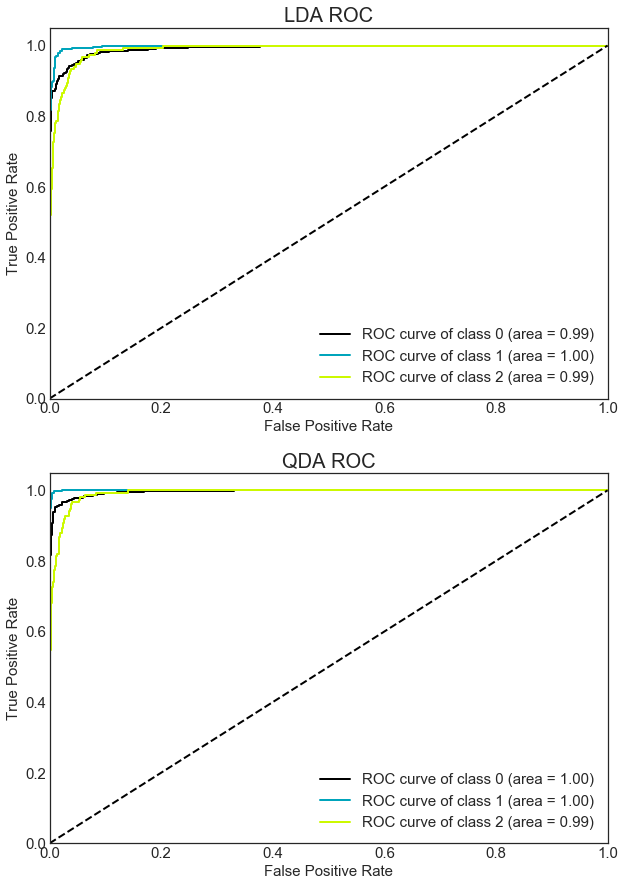

In [83]:
y_probs_lda = lda_model.predict_proba(X)
y_probs_qda = qda_model.predict_proba(X)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 15))

ax1 = plot_roc(y, y_probs_lda, figsize = (8, 7), title_fontsize = 20,
         text_fontsize = 15, plot_micro = False, plot_macro = False, ax = ax1, title = "LDA ROC")

ax2 = plot_roc(y, y_probs_qda, figsize = (8, 7), title_fontsize = 20,
         text_fontsize = 15, plot_micro = False, plot_macro = False, ax = ax2, title = "QDA ROC")
plt.show()

In [81]:
lda_proba = lda_model.predict_proba(X)
qda_proba = qda_model.predict_proba(X)

lda_auc = roc_auc_score(y, lda_proba, multi_class = "ovr")
qda_auc = roc_auc_score(y, qda_proba, multi_class = "ovr")

print("LDA AUC:", lda_auc)
print("QDA AUC:", qda_auc)
print("LDA model score:", lda_model_score)
print("QDA model score:", qda_model_score)

LDA AUC: 0.9928371176378796
QDA AUC: 0.9959785110283391
LDA model score: 0.9743119266055046
QDA model score: 0.9829357798165138


## Problem 2.2

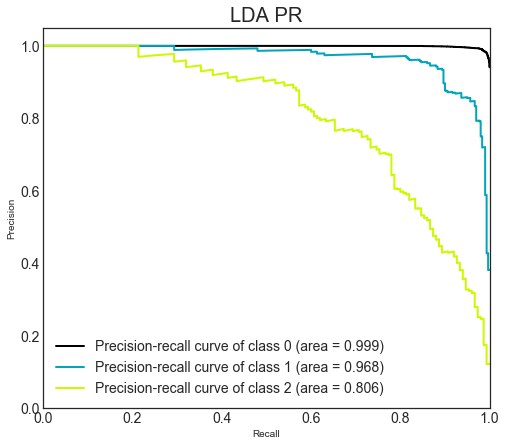

In [84]:
plot_precision_recall(y, lda_proba, figsize = (8, 7), title_fontsize = 20, text_fontsize = 14, plot_micro = False, title = "LDA PR")
plt.show()

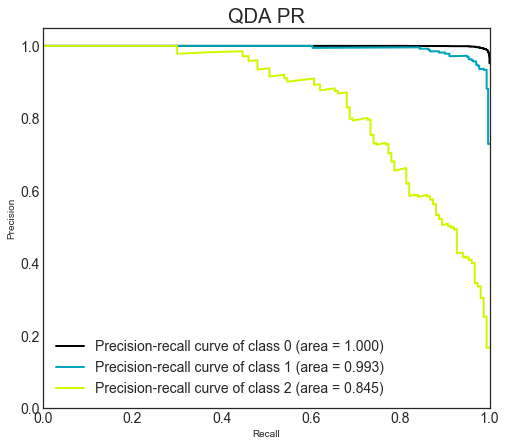

In [85]:
plot_precision_recall(y, qda_proba, figsize = (8, 7), title_fontsize = 20, text_fontsize = 14, plot_micro = False, title = "QDA PR")
plt.show()

In [86]:
y.value_counts()

0    5000
1     300
2     150
Name: Response, dtype: int64

## Problem 3.1

In [88]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3200, 15)
X_test shape: (800, 15)
y_train shape: (3200,)
y_test shape: (800,)


In [95]:
k_value_list = np.arange(30) + 1
score_results_knn = []

for val in k_value_list:
    knn = KNeighborsClassifier(n_neighbors=val)
    kfold = KFold(n_splits=10)
    score = cross_val_score(knn, X_train, y_train, cv = kfold, scoring = "accuracy")
    score_results_knn.append(score)
    print("k val: %s, CV Score Avg: %s " % (val, np.mean(score)))

k val: 1, CV Score Avg: 0.7303124999999999 
k val: 2, CV Score Avg: 0.7228125000000001 
k val: 3, CV Score Avg: 0.7784375 
k val: 4, CV Score Avg: 0.7784375 
k val: 5, CV Score Avg: 0.7896875 
k val: 6, CV Score Avg: 0.7946875 
k val: 7, CV Score Avg: 0.8074999999999999 
k val: 8, CV Score Avg: 0.8121875 
k val: 9, CV Score Avg: 0.8078125 
k val: 10, CV Score Avg: 0.8121875 
k val: 11, CV Score Avg: 0.8162499999999999 
k val: 12, CV Score Avg: 0.8181249999999999 
k val: 13, CV Score Avg: 0.813125 
k val: 14, CV Score Avg: 0.818125 
k val: 15, CV Score Avg: 0.8171875 
k val: 16, CV Score Avg: 0.8171875 
k val: 17, CV Score Avg: 0.8225 
k val: 18, CV Score Avg: 0.8209375 
k val: 19, CV Score Avg: 0.8221875000000001 
k val: 20, CV Score Avg: 0.8246874999999999 
k val: 21, CV Score Avg: 0.8253125000000001 
k val: 22, CV Score Avg: 0.8256249999999999 
k val: 23, CV Score Avg: 0.8240625000000001 
k val: 24, CV Score Avg: 0.82125 
k val: 25, CV Score Avg: 0.8215625 
k val: 26, CV Score Avg: 0

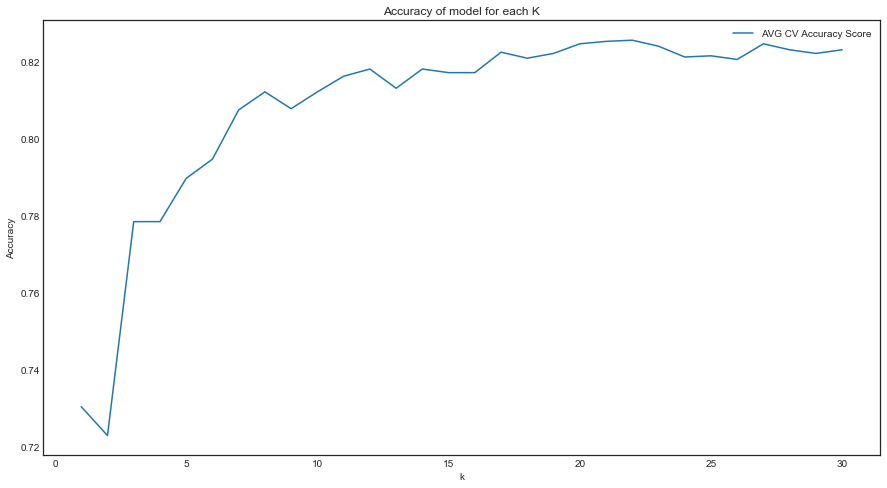

In [96]:
plt.figure(figsize = (15,8)) 
plt.plot(k_value_list, np.mean(np.array(score_results_knn), axis = 1), label = "AVG CV Accuracy Score")
plt.title("Accuracy of model for each K")
plt.xlabel("k")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [101]:
avg_cv_scores_knn = np.mean(np.array(score_results_knn), axis = 1)
max_avg_accuracy_index_knn = np.argmax(avg_cv_scores_knn) 

print("Optimal Value of k: %s" % k_value_list[max_avg_accuracy_index_knn]) 
print("Accuracy: %0.2f" % np.mean(score_results_knn[max_avg_accuracy_index_knn]))

Optimal Value of k: 22
Accuracy: 0.83


## Problem 3.2

In [102]:
knn_optimal = KNeighborsClassifier(n_neighbors = 22)

knn_optimal.fit(X_train, y_train)

train_score = knn_optimal.score(X_train, y_train)
test_score = knn_optimal.score(X_test, y_test)

print("Train score:", train_score)
print("Test score:", test_score)

Train score: 0.841875
Test score: 0.80625


In [148]:
knn_train_pred = knn_optimal.predict(X_train)
knn_test_pred = knn_optimal.predict(X_test)

print(classification_report(y_train, knn_train_pred))
print(classification_report(y_test, knn_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1619
           1       0.82      0.85      0.84      1581

    accuracy                           0.84      3200
   macro avg       0.84      0.84      0.84      3200
weighted avg       0.84      0.84      0.84      3200

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       393
           1       0.83      0.84      0.84       407

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800



## Problem 3.3

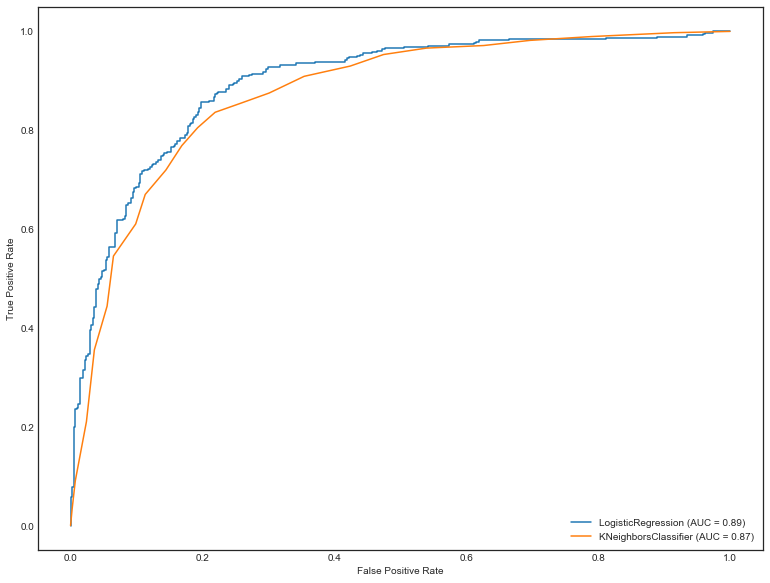

In [103]:
fig = plt.figure(figsize = (13, 10))
ax = plt.gca()
logreg_disp_test = plot_roc_curve(logreg_model, X_test, y_test, ax = ax)
knn_disp = plot_roc_curve(knn_optimal, X_test, y_test, ax = ax)
plt.show()

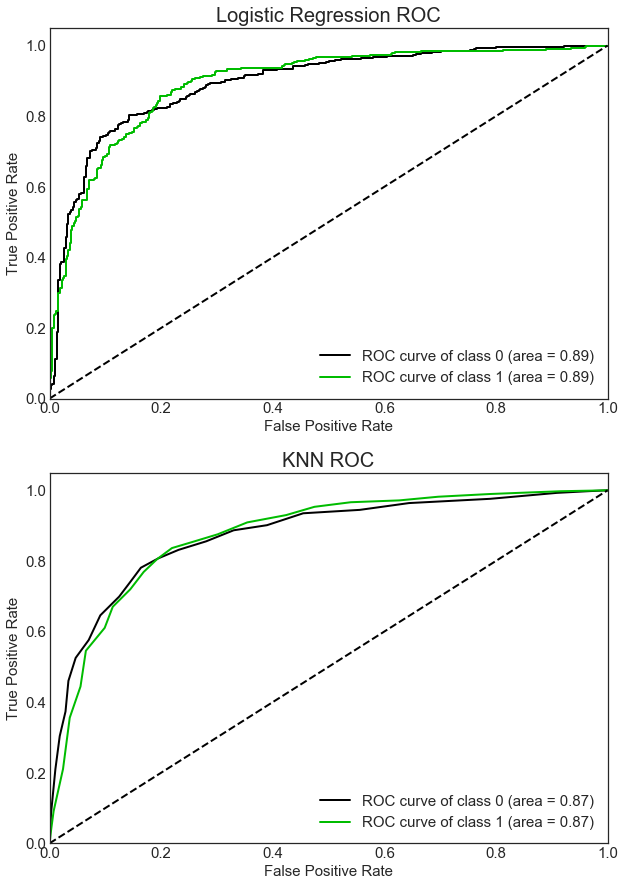

In [104]:
y_probs_logreg = logreg_model.predict_proba(X_test)
y_probs_knn = knn_optimal.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 15))

ax1 = plot_roc(y_test, y_probs_logreg, figsize = (8, 7), title_fontsize = 20,
         text_fontsize = 15, plot_micro = False, plot_macro = False, ax = ax1, title = "Logistic Regression ROC")

ax2 = plot_roc(y_test, y_probs_knn, figsize = (8, 7), title_fontsize = 20,
         text_fontsize = 15, plot_micro = False, plot_macro = False, ax = ax2, title = "KNN ROC")
plt.show()

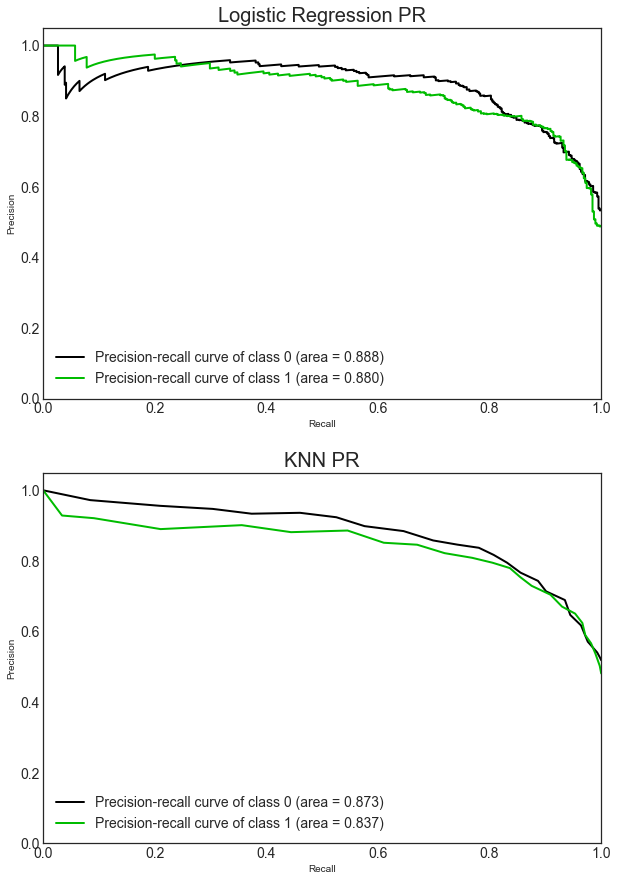

In [107]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 15))

ax1 = plot_precision_recall(y_test, y_probs_logreg,
                            figsize = (8, 7),
                            title_fontsize = 20,
                            text_fontsize = 14,
                            plot_micro = False,
                            title = "Logistic Regression PR", ax = ax1)

ax2 = plot_precision_recall(y_test, y_probs_knn,
                            figsize = (8, 7),
                            title_fontsize = 20,
                            text_fontsize = 14,
                            plot_micro = False,
                            title = "KNN PR", ax = ax2)
plt.show()